### Importing the necessary libraries -

In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

sns.set()
sns.set_style("white")
%matplotlib inline
rcParams['figure.figsize'] = [20,10]

### Loading the dataset -

In [7]:
df = pd.read_csv(r'datasets\bright_automotive_company.csv')

In [8]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


### Information about the dataset attributes and memory usage -

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


### Statistical description -

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.952562,8.712549,14.0,25.0,29.0,38.0,120.0
Salary,1568.0,60276.913265,14636.200199,30000.0,51900.0,59450.0,71700.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35948.170778,21175.212108,58.0,25000.0,31000.0,47000.0,680000.0


#### No. of Unique Values in each column -

In [11]:
unique_values = df.nunique()
display(unique_values.sort_values(ascending=False).to_frame(name='Unique Values'))

,Unique Values
Total_salary,754
Salary,535
Partner_salary,149
Price,55
Age,35
No_of_Dependents,6
Gender,4
Make,4
Profession,2
Marital_status,2


### Dimensions of the data -

In [12]:
print((df.shape),'\n')
print("Shape of bright_automotive_company.csv: ", df.shape)

(1581, 14) 

Shape of bright_automotive_company.csv:  (1581, 14)


In [13]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

# EDA -

## Data Cleaning -
### a. Check for Missing Values
### b. Handle Missing Values
### c. Remove Duplicates

In [14]:
missing_values = df.isnull().sum()
display(missing_values[missing_values>0].sort_values(ascending=False).to_frame(name='Missing Values'))

,Missing Values
Partner_salary,106
Gender,53
Salary,13
Profession,6


In [15]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [16]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [17]:
df = df.drop_duplicates()

In [18]:
df.dtypes

Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents     object
Personal_loan        object
House_loan           object
Partner_working      object
Salary              float64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object

### Correcting the Mislabeled classes in Gender -

In [19]:
df['Gender'] = ['Female' if i in {'Femle', 'Femal'} else i for i in df['Gender']]

### Checking for duplicate rows -

In [20]:
duplicates = df[df.duplicated()]

In [21]:
duplicates

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


### Checking for outliers -

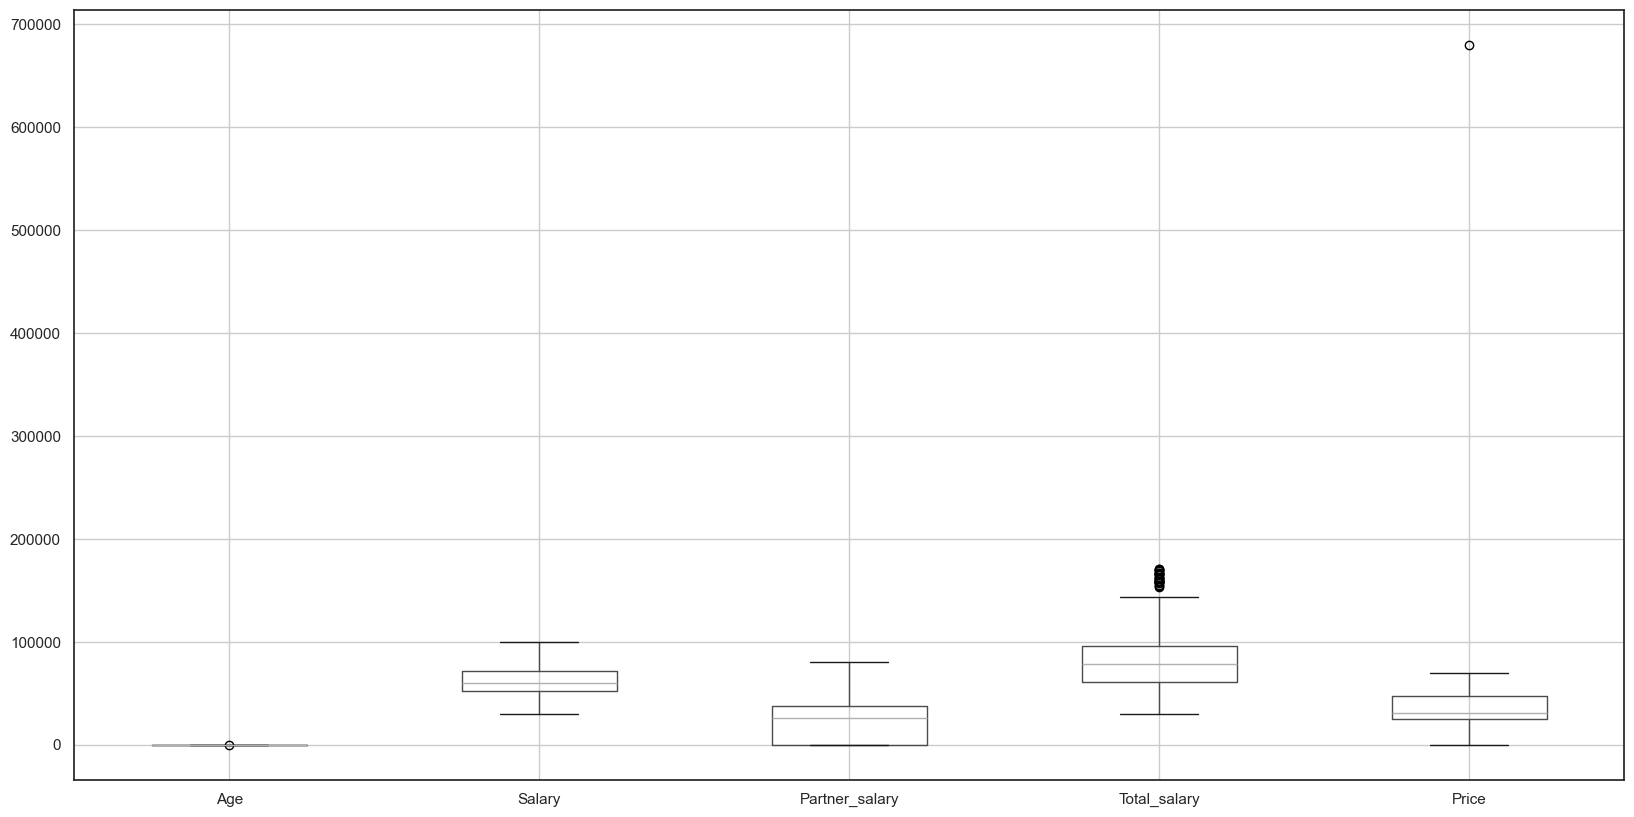

In [30]:
df.boxplot()
plt.show()

### Univariate Analysis -

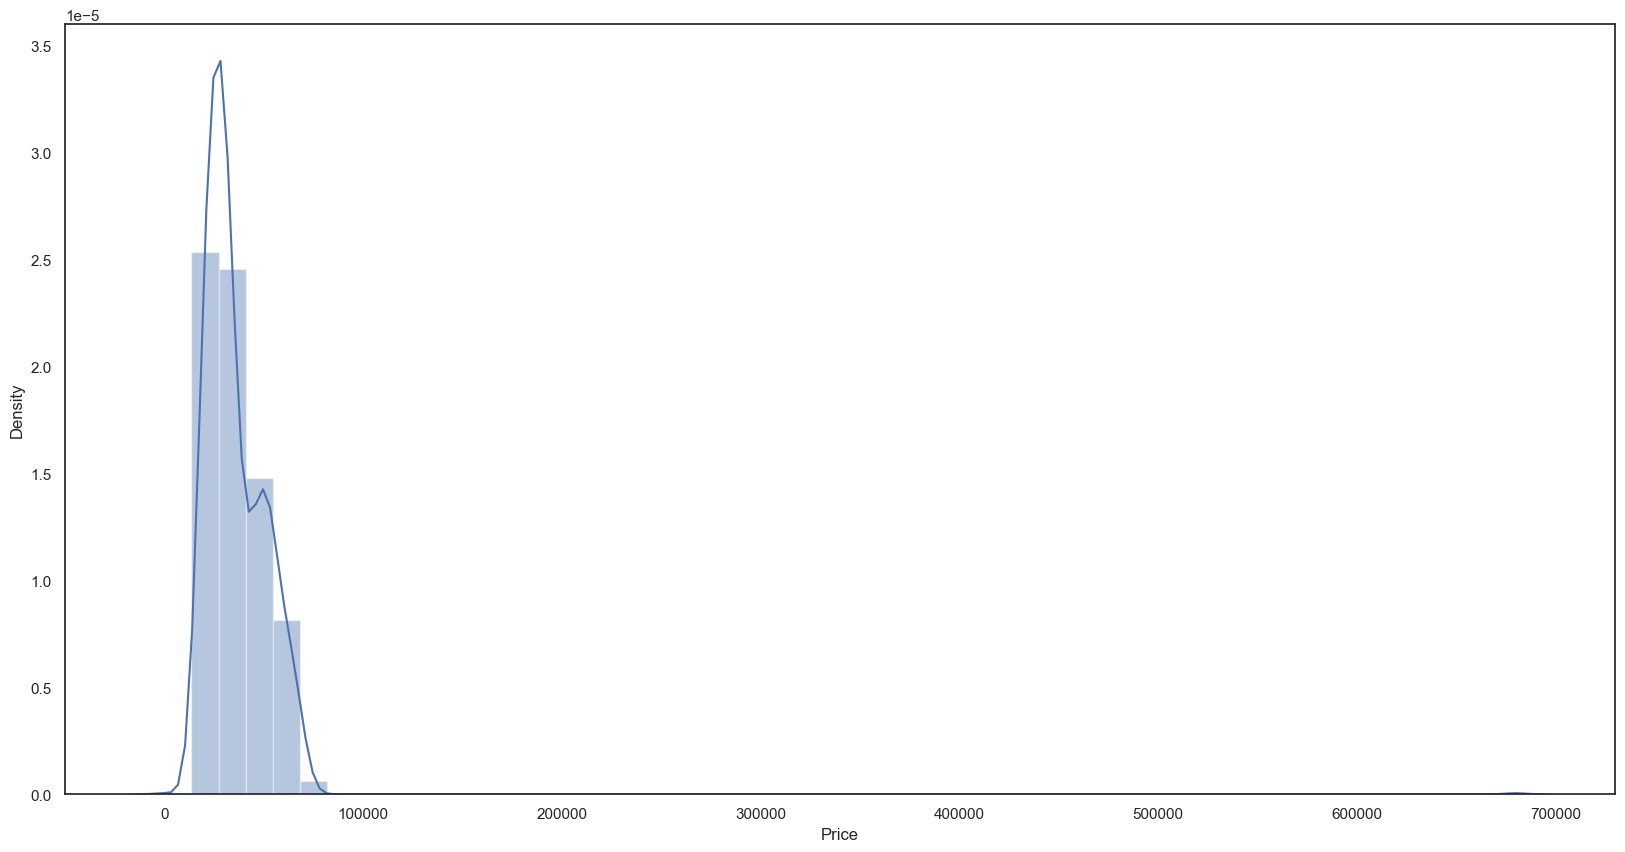

In [31]:
sns.distplot(df['Price'],kde = True)
plt.show()

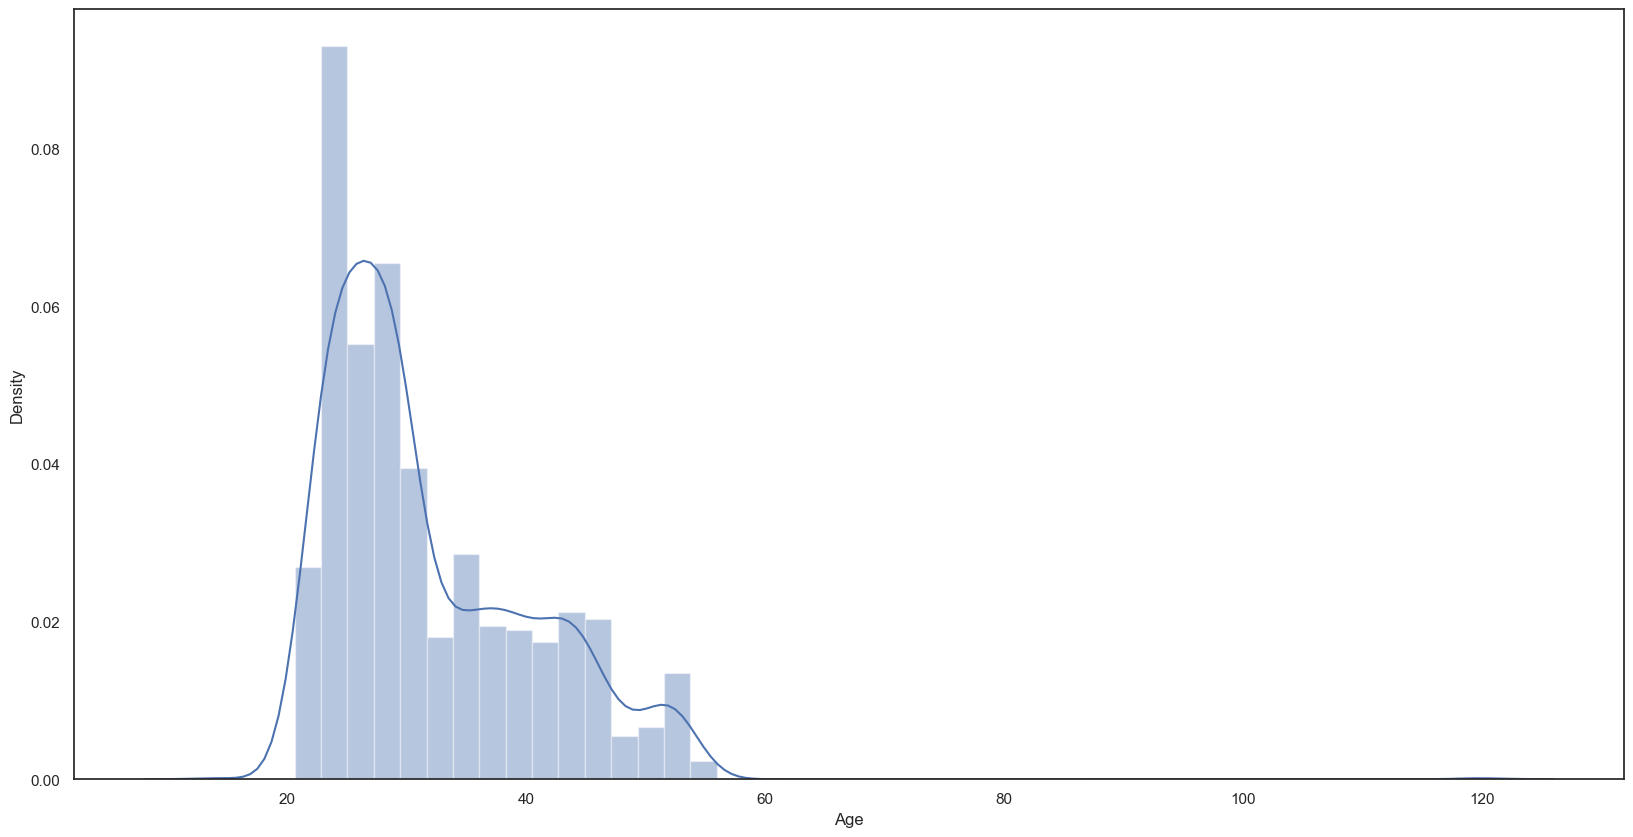

In [32]:
sns.distplot(df['Age'], kde = True)
plt.show()

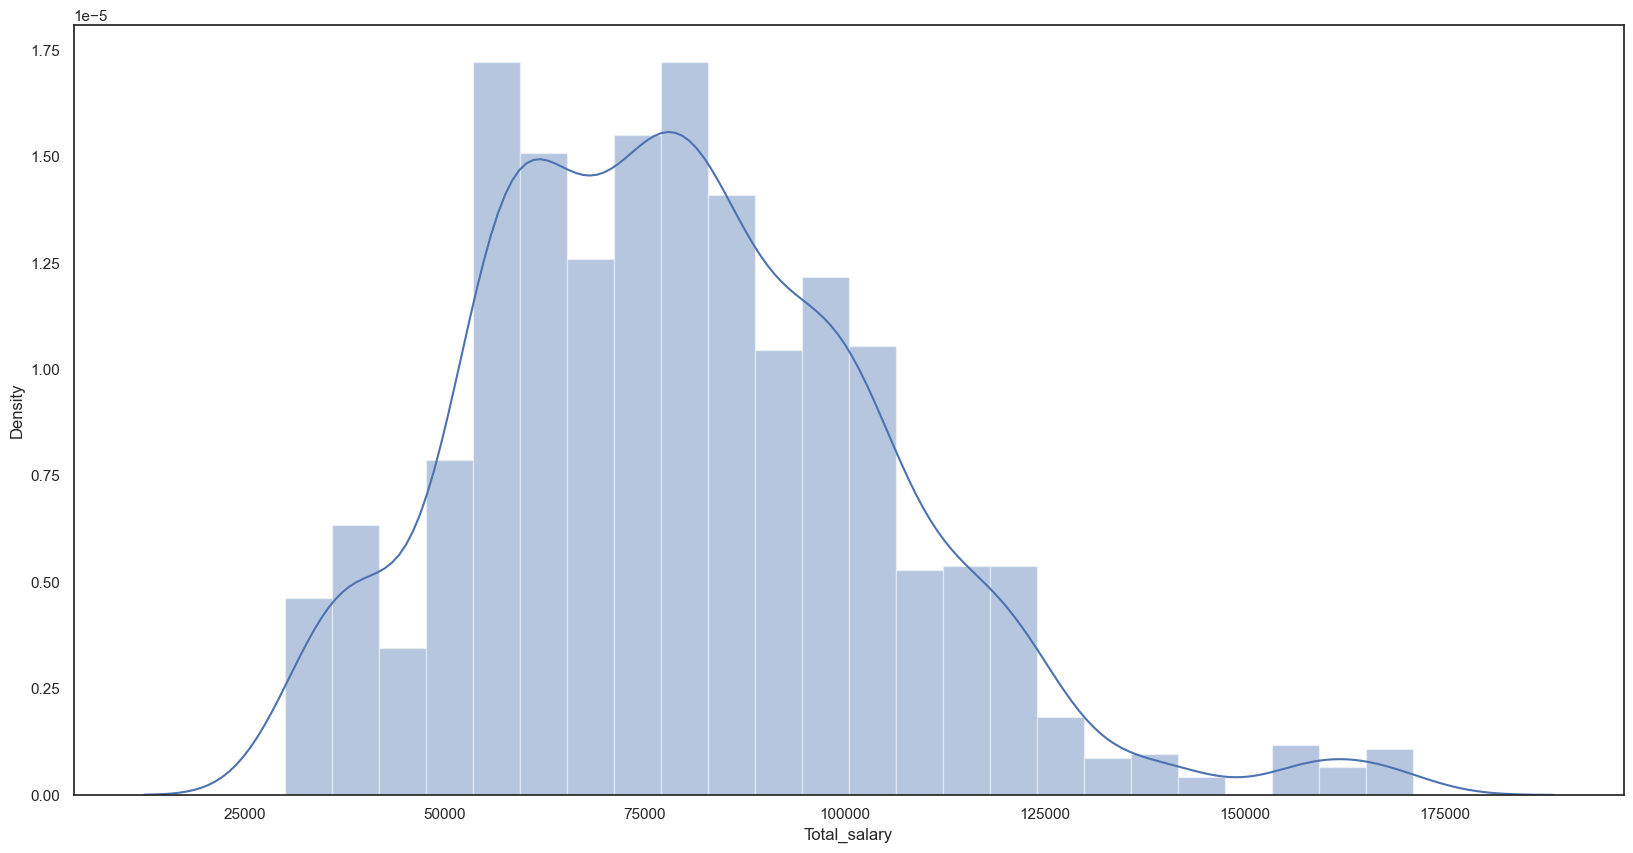

In [33]:
sns.distplot(df['Total_salary'], kde = True)
plt.show()

In [45]:
encoder = LabelEncoder()
for col in cat_cols:
        df[col] = encoder.fit_transform(df[col])

In [49]:
types = df.dtypes
display(types.to_frame(name='Data Types'))

,Data Types
Age,int64
Gender,int64
Profession,int64
Marital_status,int64
Education,int64
No_of_Dependents,int64
Personal_loan,int64
House_loan,int64
Partner_working,int64
Salary,float64


### Checking for outliers -

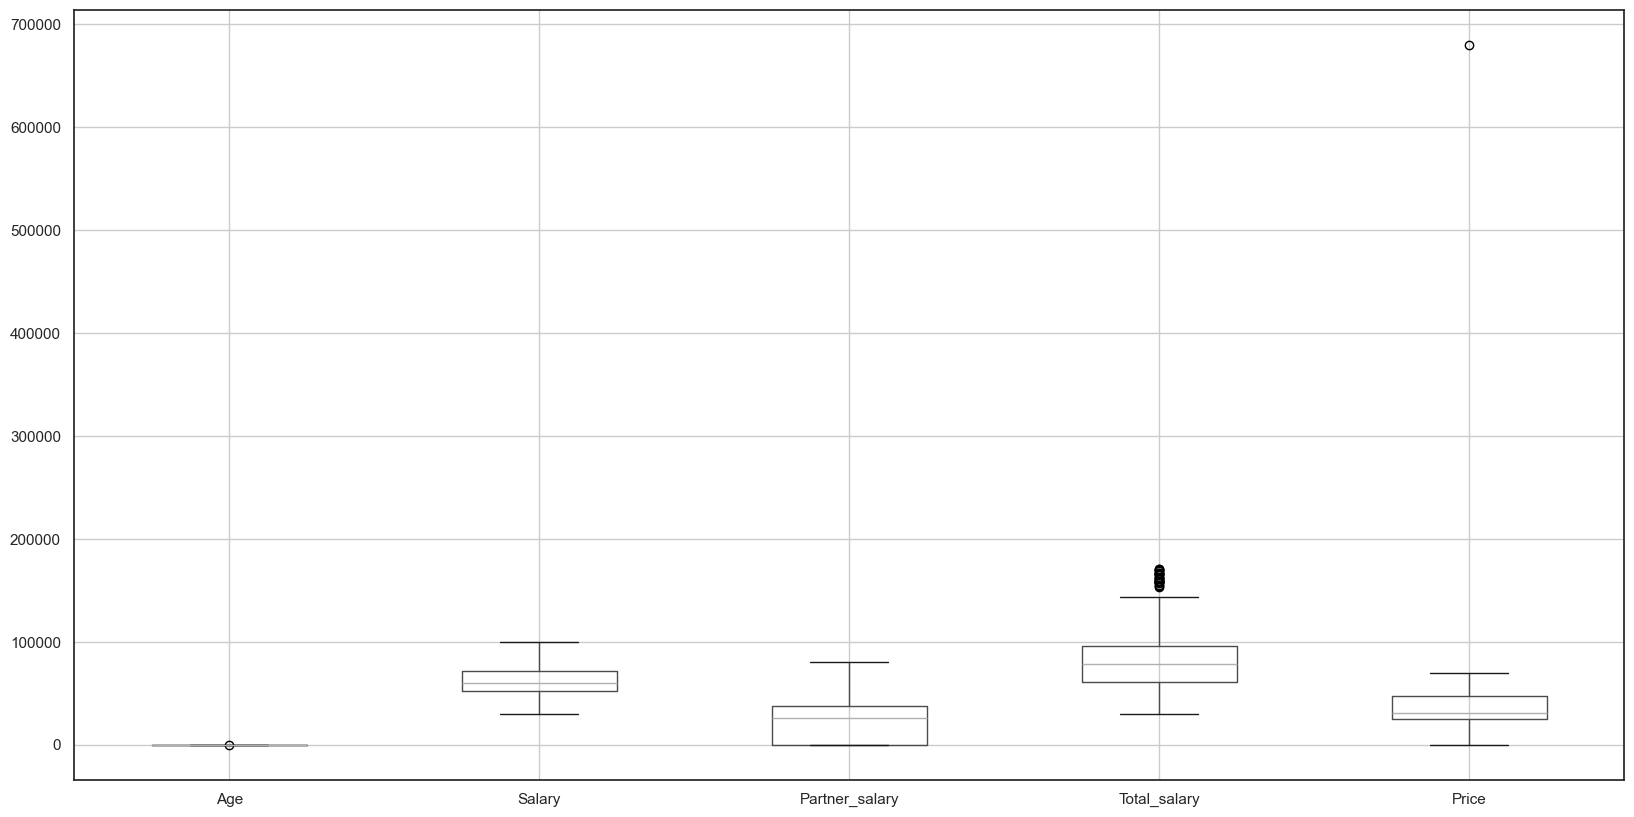

In [37]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

#### Like we can see **Total_salary** has some outliers, we can try and impute it using z-score or IQR <br> and In extreme cases drop the tuple all together

### Multi - Variate Analysis -

#### Correlation Matrix -

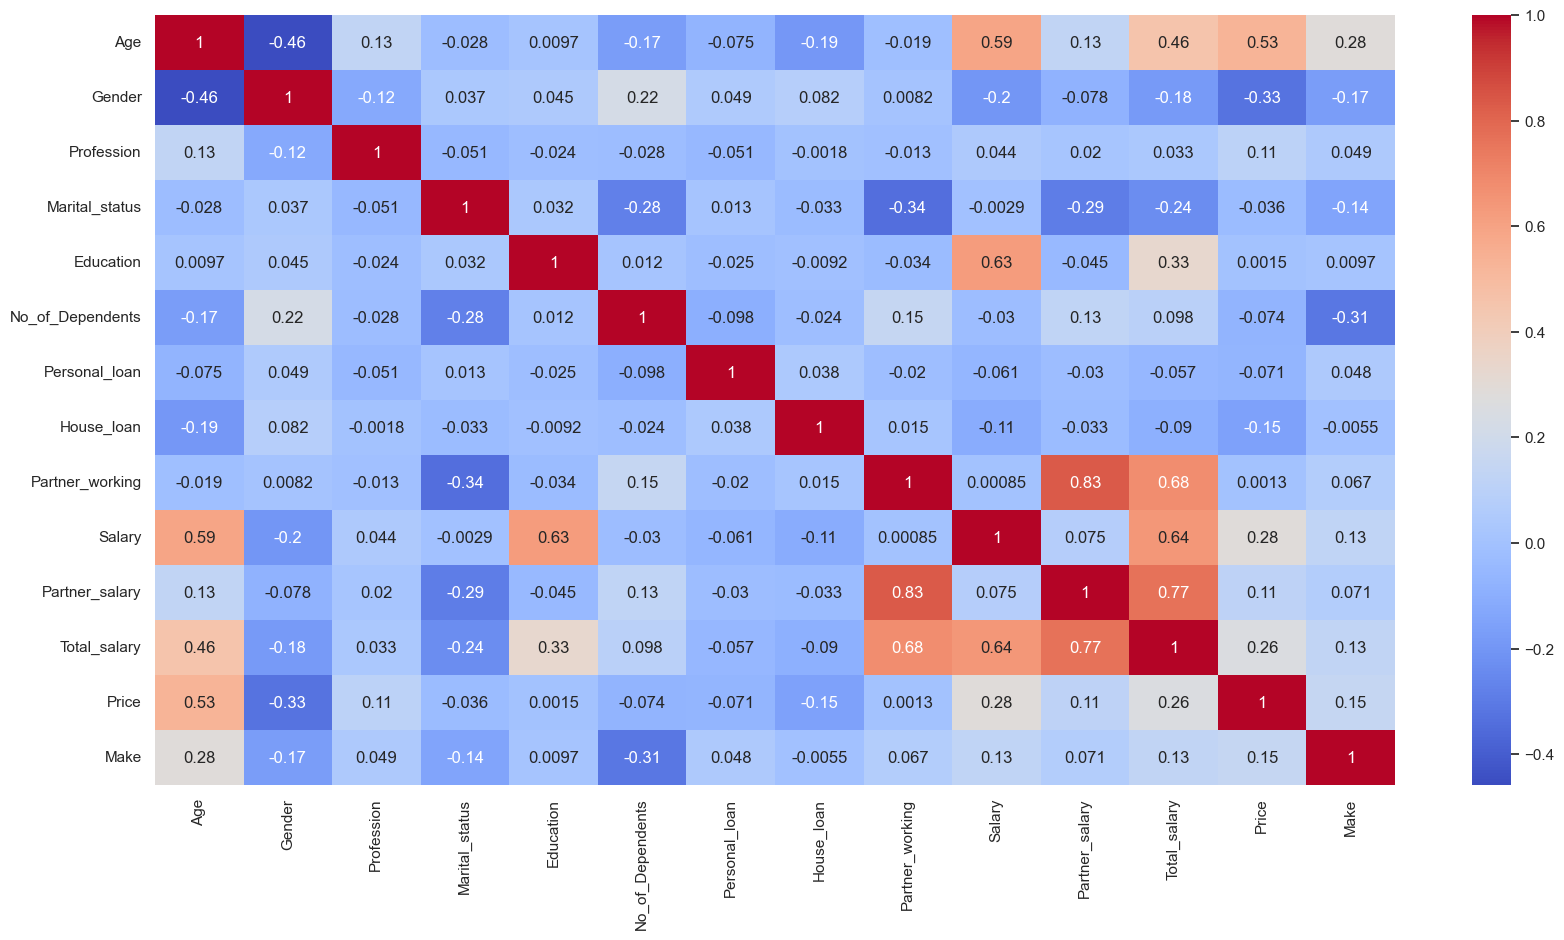

In [58]:
sns.heatmap(df.corr(), cmap = "coolwarm", annot=True)
plt.show()

## Descriptive Statistics -
### What are the mean, median, and standard deviation of the ages of individuals in the dataset?

In [61]:
mean = df['Age'].sum()/df.shape[0]
mean

np.float64(31.952561669829223)

In [60]:
median = df['Age'].median()
median

29.0

In [38]:
std = df['Age'].std()
std

8.71254886208395

## Data Distribution -
### What is the distribution of gender in the dataset? Represent it using a pie chart.

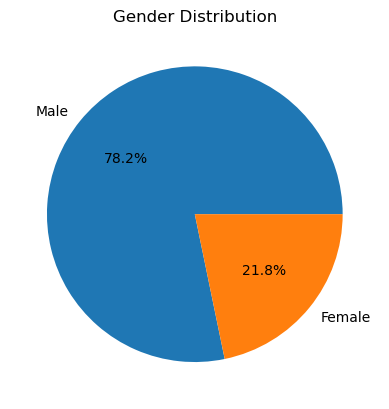

In [39]:
gender_counts = df['Gender'].value_counts()

plt.pie(gender_counts, labels=['Male','Female'], autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

## Correlation Analysis -
### Is there a correlation between age and salary? Provide the correlation coefficient and interpret the result.

In [40]:
temp_df = df[['Age', 'Salary']]

In [41]:
temp_df

,Age,Salary
0,53,99300.0
1,53,95500.0
2,53,97300.0
3,53,72500.0
4,53,79700.0
...,...,...
1576,22,33300.0
1577,22,32000.0
1578,22,32900.0
1579,22,32200.0


In [42]:
temp_df.corr()

,Age,Salary
Age,1.000000,0.604745
Salary,0.604745,1.000000


sns.heatmap(temp_df)
plt.show()

## Salary Analysis -
### What is the average salary for individuals based on their educational qualifications (Graduate vs. Post Graduate)?

In [43]:
avg_post_grad_salary = df[df['Education'] == 1]['Age'].mean()
avg_grad_salary = df[df['Education'] == 0]['Age'].mean()

In [44]:
avg_post_grad_salary, avg_grad_salary

(np.float64(32.018274111675126), np.float64(31.843959731543624))

## Loan Analysis -
### What percentage of individuals have taken a personal loan? How does this compare between males and females?

In [45]:
loans = df[df["Personal_loan"] == 1]
no_loans = df[df["Personal_loan"] == 0]

In [46]:
f'{len(loans)/len(df)*100}%'

'50.094876660341555%'

In [47]:
f'{len(no_loans)/len(df)*100}%'

'49.905123339658445%'

In [48]:
# Men vs Women - 
men_loans = loans[loans['Gender'] == 1]
women_loans = loans[loans['Gender'] == 0]

men_no_loans = no_loans[no_loans['Gender'] == 1]
women_no_loans = no_loans[no_loans['Gender'] == 0]

In [49]:
len(men_loans)/len(loans)*100

80.05050505050505

In [50]:
len(women_loans)/len(loans)*100

19.94949494949495

In [51]:
len(men_no_loans)/len(no_loans)*100

76.42585551330798

In [52]:
len(women_no_loans)/len(no_loans)*100

23.574144486692013

## Marital Status and Dependents -
### What is the average number of dependents for married individuals versus single individuals?

In [53]:
dependents_married = df[df['Marital_status'] == 1]['No_of_Dependents']
dependents_unmarried = df[df['Marital_status'] == 0]['No_of_Dependents']


In [54]:
f"Avg married dependents: {dependents_married.sum()/len(dependents_married)}"

'Avg married dependents: 1.608695652173913'

In [55]:
f"Avg unmarried dependents: {dependents_unmarried.sum()/len(dependents_unmarried)}"

'Avg unmarried dependents: 2.541926541926542'